In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math

In [2]:
N = 10
# picks out N random points in 2D
angles = sorted([random.random()*2*np.pi for _ in range(N)])
radii = [random.random() + 5 for _ in range(N)]
xy = [(r*np.cos(a), r*np.sin(a)) for r, a in zip(radii, angles)]
xy.append(xy[0])
x, y = [i[0] for i in xy], [i[1] for i in xy]

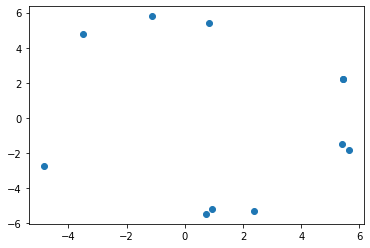

In [3]:
plt.scatter(x, y)

In [4]:
t, c = interpolate.splprep(np.array((x, y)), s=0)

In [5]:
num_pts = 100000
unew = np.arange(0, 1 + 1/num_pts, 1/num_pts)

In [6]:
out = interpolate.splev(unew, t)

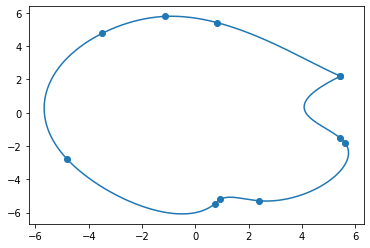

In [7]:
plt.scatter(x,y)
plt.plot(out[0], out[1])

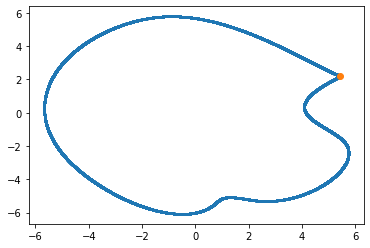

In [8]:
# but the spline points aren't equally spaced
# but it's hard to tell here because there are so many...
plt.scatter(out[0], out[1], s=1)
plt.scatter(out[0][0], out[1][0])

In [9]:
# How to get equal area? Let's calculate the area of each section
# assume the spline is a series of lines connecting the spline points

In [10]:
# use heron's formula
def heron(a,b,c):
    s = (a + b + c) / 2
    return math.sqrt(s * (s - a) * (s - b) * (s - c))

def radius(x,y):
    return (x*x+y*y)**0.5

In [11]:
shift_x = out[0][1:] - out[0][:-1]
shift_y = out[1][1:] - out[1][:-1]
dists = radius(shift_x, shift_y)
rs = radius(out[0], out[1])
areas = [heron(a, b, c) for a, b, c in zip(dists, rs[1:], rs[:-1])]

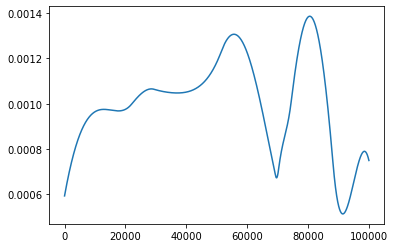

In [12]:
# distribution of area
plt.plot(areas)

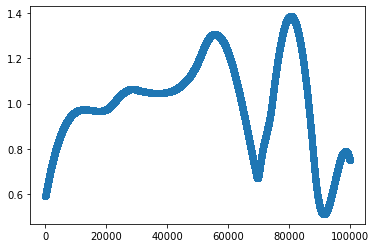

In [13]:
# the distribution of area will vary by 2-3x!
m = np.mean(areas)
plt.scatter(range(len(areas)), [i/m for i in areas])

In [14]:
# now the goal is to pick spline points that make the area about the same.
approx_even_pts = 20 # this will be approximate
target = sum(areas)/approx_even_pts
new_pts = [0]
new_areas = []
i = 0
while i < len(areas):
    a = 0
    while a < target and i < len(areas):
        a += areas[i]
        i += 1
#     print(i, a)
    new_pts.append(i)
    new_areas.append(a)

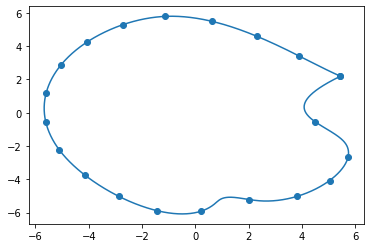

In [15]:
# here's a best guess of equal points:
new_x, new_y = out[0][new_pts[:-1]], out[1][new_pts[:-1]]
new_x = np.append(new_x, new_x[0])
new_y = np.append(new_y, new_y[0])
plt.scatter(new_x, new_y)
plt.plot(out[0], out[1])

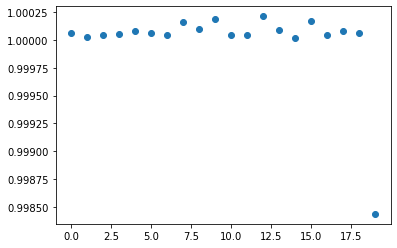

In [16]:
# distribution of area
# the last one will be a bit small, but hopefully it's within 1% or so of equal area
m = np.mean(new_areas)
plt.scatter(range(len(new_areas)), [i/m for i in new_areas])

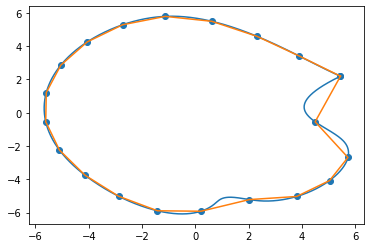

In [17]:
# the new tetrahedron doesn't exactly match the spline, of course
plt.plot(out[0], out[1])
plt.plot(new_x, new_y)
plt.scatter(new_x, new_y)

In [18]:
n_shift_x = new_x[1:] - new_x[:-1]
n_shift_y = new_y[1:] - new_y[:-1]
n_dists = radius(n_shift_x, n_shift_y)
n_rs = radius(new_x, new_y)
n_areas = [heron(a, b, c) for a, b, c in zip(n_dists, n_rs[1:], n_rs[:-1])]

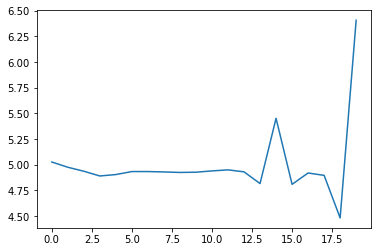

In [19]:
# we should check the areas of the new tetrahedron, exactly
plt.plot(n_areas)

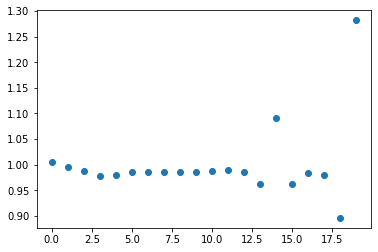

In [20]:
m = np.mean(n_areas)
plt.scatter(range(len(n_areas)), [i/m for i in n_areas])
# there will be variation here, but hopefully each wedge is within 10% of others' area

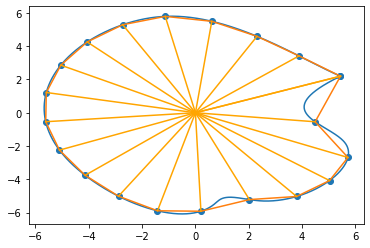

In [21]:
# the wedges themselves
# looks ok to me!
plt.plot(out[0], out[1])
plt.plot(new_x, new_y)
plt.scatter(new_x, new_y)
for i in range(len(new_x)):
    plt.plot([0, new_x[i]], [0, new_y[i]], color='orange')